<a href="https://colab.research.google.com/github/NeevSabhani/Data-Science/blob/main/Unit5/NeevSabhUnit7Proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install git+https://github.com/pydata/xarray.git
!pip install bambi
!pip install preliz
import numpy as np
import pandas as pd
import arviz as az
import matplotlib.pyplot as plt
import xarray as xr
import bambi as bmb
import pymc as pm

  Cloning https://github.com/pydata/xarray.git to /tmp/pip-req-build-zai_kgsd
  Running command git clone --filter=blob:none --quiet https://github.com/pydata/xarray.git /tmp/pip-req-build-zai_kgsd
  Resolved https://github.com/pydata/xarray.git to commit 0184702f16c3f744fc9096c7dac690626dcc6922
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for xarray: filename=xarray-2025.1.3.dev22+g0184702f-py3-none-any.whl size=1262235 sha256=0c6dd5e4e6e77708308bbdb5a40a51b8d89ec7e0e07a47de8db6142fbece57ae
  Stored in directory: /tmp/pip-ephem-wheel-cache-z8_suis1/wheels/15/f9/46/ac58ec95d7761bd0b92f54d99c5d132719866f63745c3702ed
Successfully built xarray
  Attempting uninstall: xarray
    Found existing installation: xarray 2025.1.2
    Uninstalling xarray-2025.1.2:
      Successfully uninstalled xarray-2025.1.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.2/109.2 kB 2.2 MB/s eta 0:00:00
   ━

#**Unit 7 Project: Hourly Energy Consumption**

In [146]:
corncsv = '/content/loan_data.csv'
corn = pd.read_csv(corncsv)
#corn = corn.rename(columns={"Fertilizer amount": "Fertilizer"})
#corn = corn.dropna().reset_index(drop=True)
corn = corn.head(1000)
corn = corn.iloc[::20].reset_index(drop=True)
corn

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,25.0,male,Bachelor,195718.0,0,RENT,35000.0,VENTURE,7.49,0.18,4.0,684,Yes,0
2,26.0,male,Bachelor,75503.0,5,RENT,30000.0,MEDICAL,17.99,0.40,2.0,616,No,1
3,21.0,female,Bachelor,158338.0,0,RENT,30000.0,VENTURE,5.99,0.19,4.0,623,Yes,0
4,24.0,male,Bachelor,300951.0,2,RENT,18000.0,EDUCATION,12.98,0.06,3.0,671,No,0
5,26.0,male,Bachelor,281792.0,1,MORTGAGE,21600.0,HOMEIMPROVEMENT,12.18,0.08,3.0,584,Yes,0
6,22.0,female,Bachelor,16890.0,0,OWN,4750.0,EDUCATION,11.01,0.28,3.0,645,No,1
7,23.0,male,Bachelor,258980.0,0,MORTGAGE,35000.0,MEDICAL,14.79,0.14,3.0,618,Yes,0
8,23.0,male,High School,17859.0,0,OWN,7750.0,PERSONAL,17.04,0.43,4.0,626,No,1
9,24.0,male,Associate,80145.0,1,RENT,25000.0,EDUCATION,9.91,0.31,2.0,636,No,1


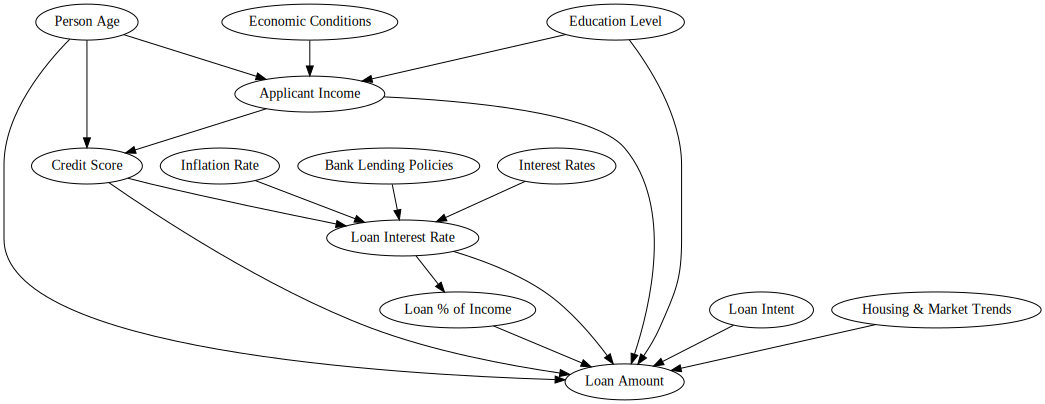

In [163]:
import graphviz

dot = graphviz.Digraph(format='png')

dot.node("Age", "Person Age")
dot.node("Education", "Education Level")
dot.node("Income", "Applicant Income")
dot.node("LoanIntent", "Loan Intent")
dot.node("LoanAmt", "Loan Amount")
dot.node("LoanIntRate", "Loan Interest Rate")
dot.node("LoanPctIncome", "Loan % of Income")
dot.node("CreditScore", "Credit Score")


dot.node("InterestRates", "Interest Rates")
dot.node("Inflation", "Inflation Rate")
dot.node("EconomicConditions", "Economic Conditions")
dot.node("BankPolicies", "Bank Lending Policies")
dot.node("MarketTrends", "Housing & Market Trends")


dot.edge("Age", "LoanAmt")
dot.edge("Education", "LoanAmt")
dot.edge("Income", "LoanAmt")
dot.edge("LoanIntent", "LoanAmt")
dot.edge("LoanIntRate", "LoanAmt")
dot.edge("LoanPctIncome", "LoanAmt")
dot.edge("CreditScore", "LoanAmt")


dot.edge("InterestRates", "LoanIntRate")
dot.edge("Inflation", "LoanIntRate")
dot.edge("EconomicConditions", "Income")
dot.edge("BankPolicies", "LoanIntRate")
dot.edge("MarketTrends", "LoanAmt")

dot.edge("Age", "CreditScore")
dot.edge("Age", "Income")
dot.edge("Education", "Income")
dot.edge("Income", "CreditScore")
dot.edge("CreditScore", "LoanIntRate")
dot.edge("LoanIntRate", "LoanPctIncome")


dot


In [150]:

one = [650]
two = [40000]
three = [2, 4, 7, 10, 14]



In [156]:
bspline_1 = bmb.Model(
    "loan_amnt ~ bs(credit_score, knots=one)",
    corn,
    family="negativebinomial"
)
idata_1 = bspline_1.fit(idata_kwargs={"log_likelihood": True})

Output()

/usr/local/lib/python3.11/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


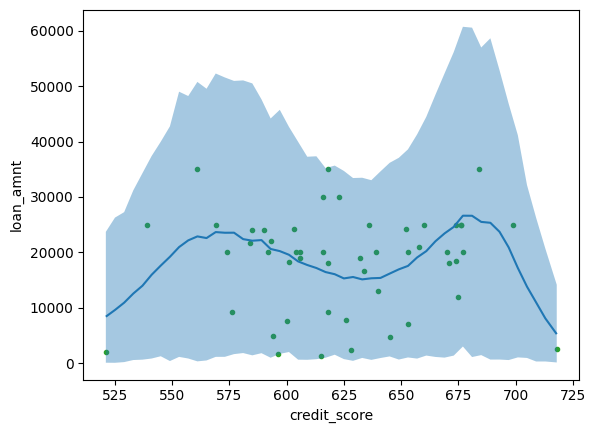

In [157]:
bmb.interpret.plot_predictions(bspline_1, idata_1, "credit_score", pps=True)
plt.plot(corn.credit_score, corn.loan_amnt, "C2.", zorder=-3)

In [158]:
priors_bspline = {
    "bs(person_income, knots=knots_sets['medium_knots'])": bmb.Prior("Normal", mu=0, sigma=3),
    "bs(credit_score, knots=[400, 600, 800])": bmb.Prior("Normal", mu=0, sigma=10),
}

In [159]:
bspline_2 = bmb.Model(
    "loan_amnt ~ bs(person_income, knots=two) + bs(credit_score, knots=one)",
    corn,
    family="negativebinomial")
idata_2 = bspline_2.fit(idata_kwargs={"log_likelihood": True})

Output()

/usr/local/lib/python3.11/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


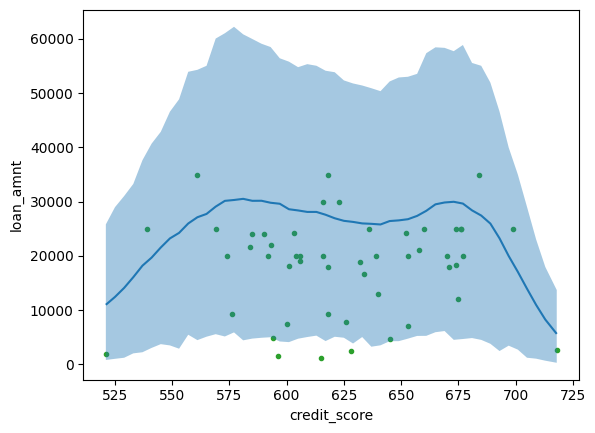

In [160]:
bmb.interpret.plot_predictions(bspline_2, idata_2, "credit_score", pps=True)
plt.plot(corn.credit_score, corn.loan_amnt, "C2.", zorder=-3)

/usr/local/lib/python3.11/dist-packages/arviz/stats/stats.py:795: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.70 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/arviz/stats/stats.py:795: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.70 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(


<Axes: title={'center': 'Model comparison\nhigher is better'}, xlabel='elpd_loo (log)', ylabel='ranked models'>

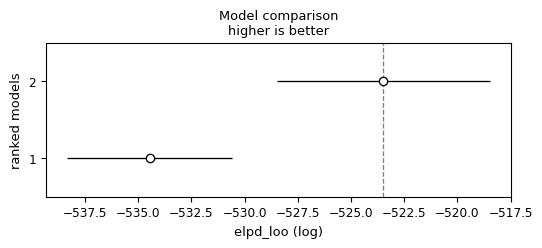

In [162]:
bd = az.compare({"1":idata_1, "2":idata_2})
az.plot_compare(bd)